Well Log Data Analysis with Python

 


First thing first, let's import the Python libraries that we will use such as Welly,NumPy,Pandas,Seaborn 

In [16]:
import welly


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



Welly Library is a Python Library used to facilitates the loading, processing, and analysis of subsurface wells and well data

Numpy is a popular Python library used for scientific computing and data analysis. It provides functions for working with arrays and matrices, performing mathematical opererations, and generating random numbers.

Pandas is popular Python library used for data analysis and manipulation. It provides data structures such Series and DataFrame to represent and manipulate tabular data.

Matplotlib is a popular Python plotting library. It provides functions for creating a wide range of static, animated, and interactive visualizations in 2D and 3D.

Seaborn is a popular Python plotting library. It is built on top of Matplotlib and provides a high-level interface for creating attractive and informative statistical graphics.

Now, we load, convert and store our Well file into the variable well

The Log file used was downloaded from an Open Source which is the National Offshore Petroleum Information Management System

In [18]:
well = welly.Well.from_las('Esso_BTWW2PH_S1R1_SonicScanner_220m_1352m_Processed Results_Mar20.las')


Let's see the type of file that well represents

In [19]:
type(well)

welly.well.Well

As we can see, our file was successfully converted to a new type
Now let's run it 

In [20]:
well

Well(uwi: '', name: 'West Barracouta W2 Pilot Hole', 9 curves: ['MD:2', 'BS', 'DTCO', 'DTSH', 'GR_EDTC', 'HD1_PPC1', 'HD2_PPC1', 'PR', 'VPVS'])

By running the variable data, Python gives us metadata about our well.
Now let's see the header by running well.header

In [21]:
well.header

,original_mnemonic,mnemonic,unit,value,descr,section
0,VERS,VERS,,2.0,CWLS Log ASCII Standard - VERSION 2.0,Version
1,WRAP,WRAP,,NO,One Line per depth step,Version
2,PROD,PROD,,Schlumberger,LAS Producer,Version
3,PROG,PROG,,DLIS to ASCII 2.3,LAS Program name and version,Version
4,CREA,CREA,,2020/03/20 13:20 :LAS...,mm},Version
5,DLIS_CREA,DLIS_CREA,,2020-Feb-20 13:36 :DL...,mm},Version
6,SOURCE,SOURCE,,Esso_BTWW2PH_S1R1_SonicScanner_220m_1352m_Proc...,DLIS File Name,Version
7,FILE-ID,FILE-ID,,West Barracouta W2 Pilot Hole,File Identification Number,Version
8,STRT,STRT,M,220.0656,START DEPTH,Well
9,STOP,STOP,M,1352.8548,STOP DEPTH,Well


Voila!
Now let's run another command to see our data frame by using well.df() which df stands for data frame

In [22]:
df = well.df()

In [23]:
df

,MD:2,BS,DTCO,DTSH,GR_EDTC,HD1_PPC1,HD2_PPC1,PR,VPVS
MD:1,,,,,,,,,
220.0656,220.0656,17.5,NaN,NaN,14.0960,12.4796,12.4381,NaN,NaN
220.2180,220.2180,17.5,NaN,NaN,14.4890,12.4796,12.4502,NaN,NaN
220.3704,220.3704,17.5,NaN,NaN,15.0144,12.4691,12.4381,NaN,NaN
220.5228,220.5228,17.5,NaN,NaN,17.2189,12.4693,12.4381,NaN,NaN
220.6752,220.6752,17.5,NaN,NaN,16.7740,12.4587,12.4497,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1352.2452,1352.2452,9.5,NaN,NaN,27.1637,9.5878,9.6613,NaN,NaN
1352.3976,1352.3976,9.5,NaN,NaN,27.1637,9.6324,9.7741,NaN,NaN
1352.5500,1352.5500,9.5,NaN,NaN,27.1637,9.6210,9.6356,NaN,NaN


Let's see our data frame information

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7434 entries, 220.0656 to 1352.8548000000005
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MD:2      7433 non-null   float64
 1   BS        7433 non-null   float64
 2   DTCO      6156 non-null   float64
 3   DTSH      7380 non-null   float64
 4   GR_EDTC   7433 non-null   float64
 5   HD1_PPC1  7433 non-null   float64
 6   HD2_PPC1  7433 non-null   float64
 7   PR        6156 non-null   float64
 8   VPVS      6156 non-null   float64
dtypes: float64(9)
memory usage: 580.8 KB


Let's use seaborn library to visualize our data frame

<AxesSubplot: ylabel='MD:1'>

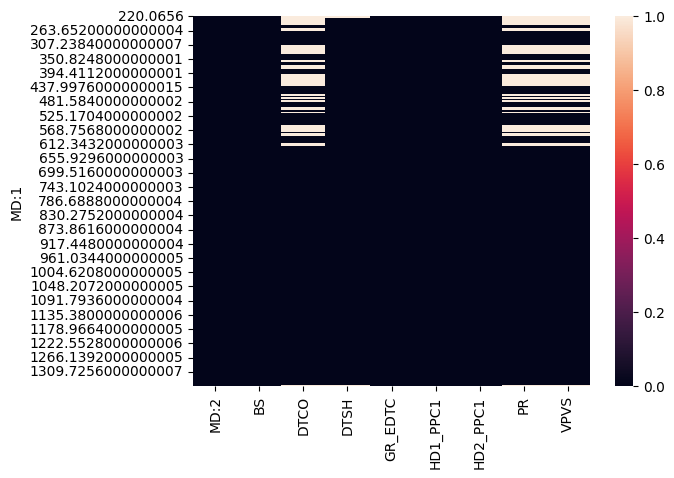

In [25]:
sns.heatmap(df.isna())

Now, let's see how many curves does our log have

In [26]:
well.count_curves()

9

voila!
Let's plot them now

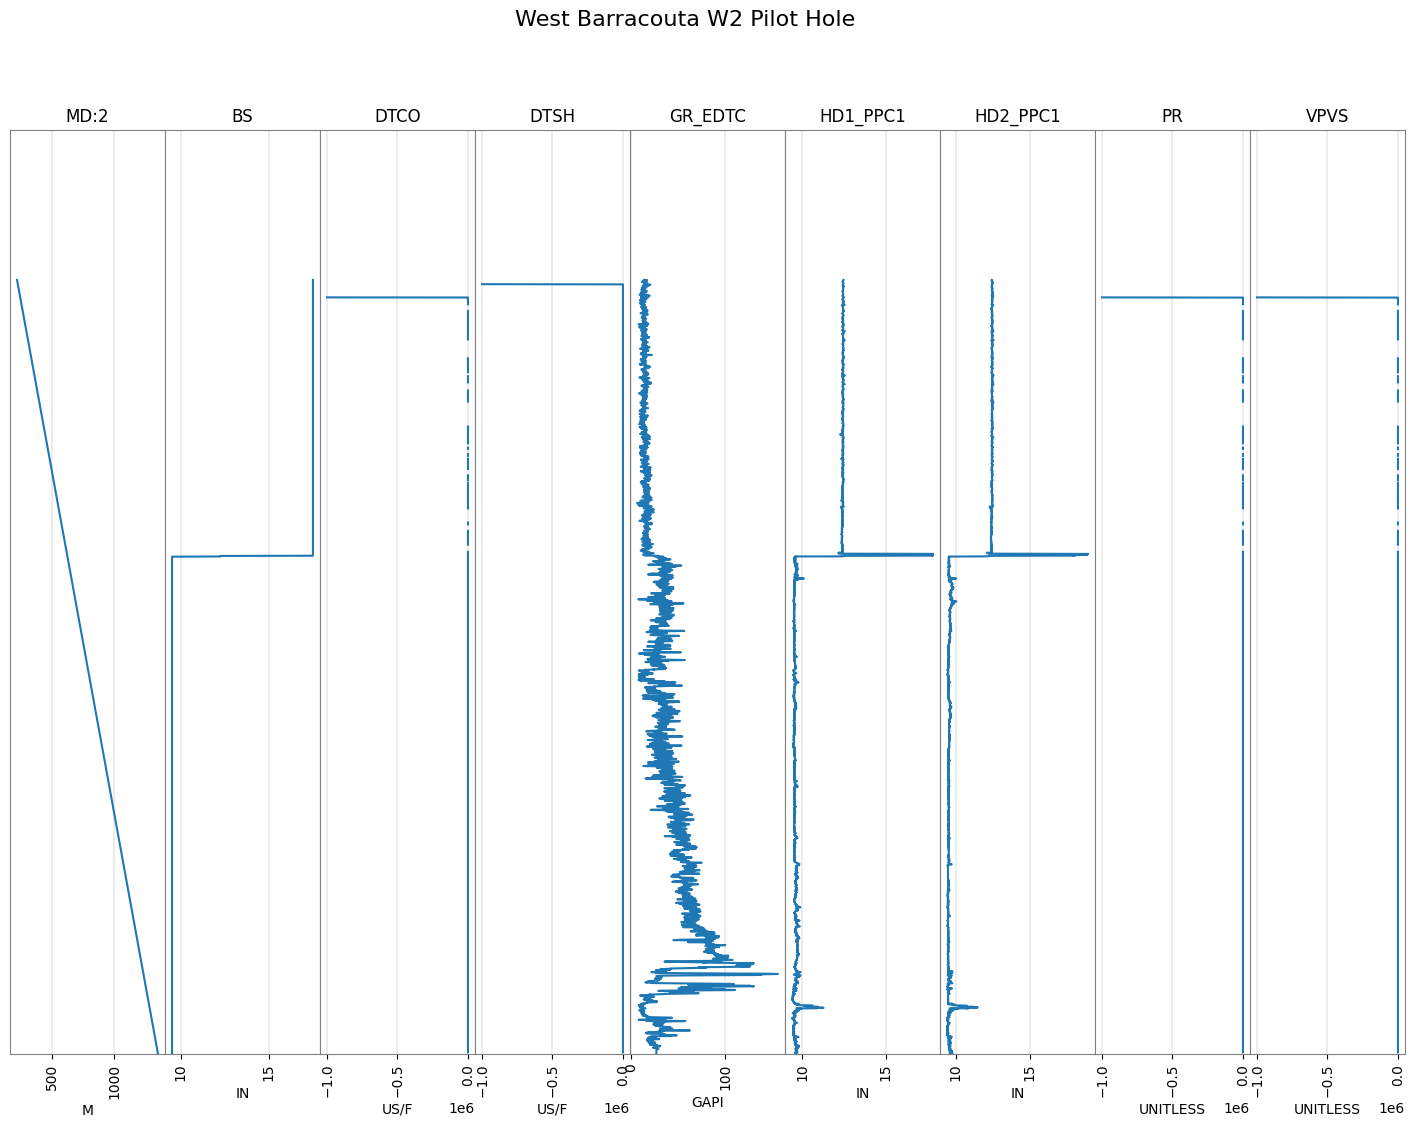

In [27]:
well.plot()

What if we only want to see two of them for example the 'DTCO' and 'GR_EDTC' 

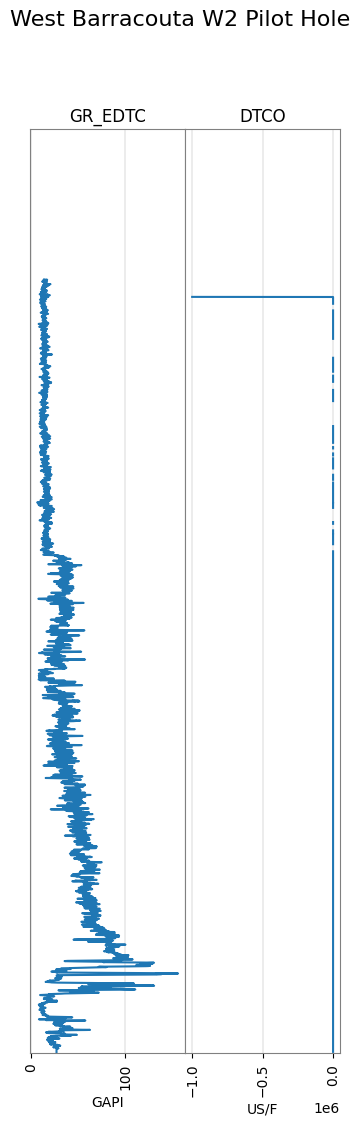

In [28]:
tracks = ['GR_EDTC','DTCO']
well.plot(tracks = tracks)

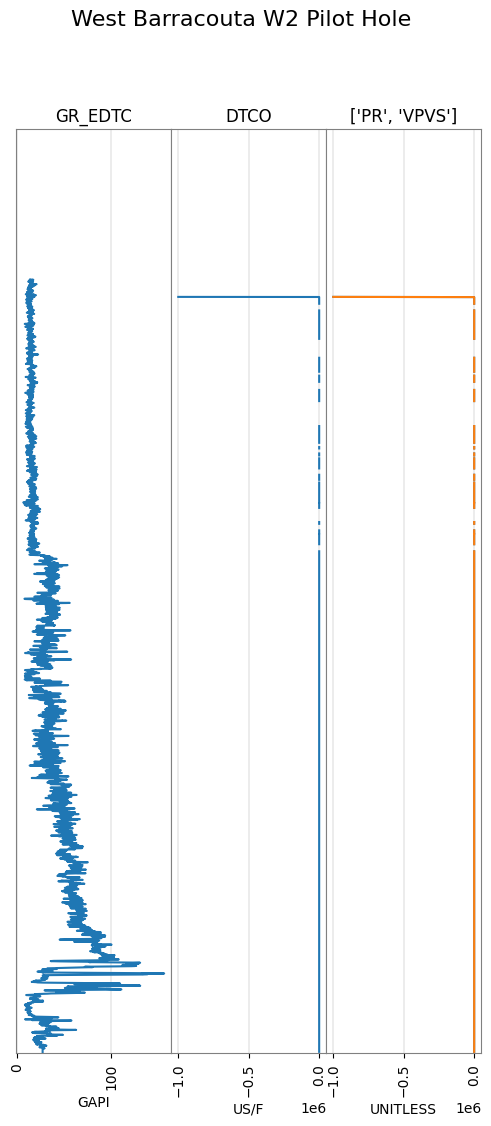

In [29]:
tracks = ['GR_EDTC','DTCO',['PR','VPVS']]
well.plot(tracks = tracks)

Let's say we want a specific depth interval,
We will use the unify_basis command

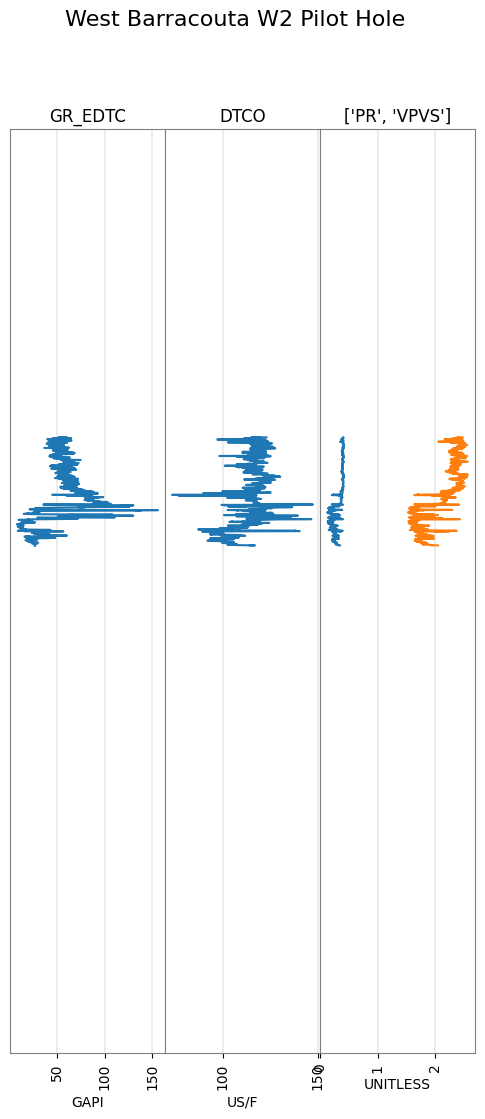

In [30]:
well.unify_basis( start = 1000, stop = 3000)
tracks = ['GR_EDTC','DTCO',['PR','VPVS']]
well.plot(tracks = tracks)